# Proyecto de Churn en Telecomunicaciones: Análisis y Modelado Predictivo

**Objetivo del Proyecto:**

Este proyecto tiene como objetivo analizar los datos de una empresa de telecomunicaciones para construir un modelo de Machine Learning capaz de predecir qué clientes tienen una alta probabilidad de cancelar su servicio (churn). La identificación temprana de estos clientes permite a la empresa tomar acciones proactivas para retenerlos, reduciendo así la pérdida de ingresos.

**Metodología:**

El proyecto sigue un flujo de trabajo estructurado de ciencia de datos:
1.  **Carga y Exploración de Datos:** Se cargarán y examinarán los diferentes conjuntos de datos para comprender su estructura y contenido.
2.  **Preprocesamiento y Limpieza:** Se realizarán tareas de limpieza, como la conversión de tipos de datos, el manejo de valores ausentes y la unificación de los datos en un solo DataFrame.
3.  **Análisis Exploratorio de Datos (EDA):** Se analizarán las variables para descubrir patrones, correlaciones y características que influyen en el churn.
4.  **Preparación de Datos para Modelado:** Se prepararán los datos para el entrenamiento de modelos, incluyendo la codificación de variables categóricas y el escalado de características numéricas.
5.  **Entrenamiento y Evaluación de Modelos:** Se entrenarán y evaluarán varios modelos de clasificación para identificar el de mejor rendimiento en la predicción del churn.

## 1. Carga y Exploración Inicial de Datos

En esta primera fase, cargamos todas las librerías necesarias y los archivos de datos. Cada archivo (`contract.csv`, `internet.csv`, `personal.csv`, `phone.csv`) contiene una pieza diferente de la información del cliente. Realizaremos una inspección inicial para entender la estructura, los tipos de datos y la presencia de valores nulos en cada uno.

In [22]:
# ============================================================================================
# CELDA 1: IMPORTACIÓN DE LIBRERÍAS
# ============================================================================================
# Se importan las librerías fundamentales para el análisis y la manipulación de datos.

# Pandas: para la manipulación y análisis de datos tabulares (DataFrames).
import pandas as pd
# NumPy: para operaciones numéricas eficientes, especialmente con arrays.
import numpy as np
# Matplotlib.pyplot: para la creación de visualizaciones estáticas.
import matplotlib.pyplot as plt
# Seaborn: para crear visualizaciones estadísticas más atractivas y complejas.
import seaborn as sns

In [23]:
# ============================================================================================
# CELDA 2: CARGA DE LOS ARCHIVOS DE DATOS
# ============================================================================================
# Se cargan los cuatro archivos CSV que contienen los datos de los clientes.
# Cada archivo se carga en un DataFrame de Pandas independiente.

# contract.csv: Información sobre el contrato del cliente (tipo, fechas, facturación).
contract = pd.read_csv('contract.csv')
# internet.csv: Información sobre los servicios de internet del cliente.
internet = pd.read_csv('internet.csv')
# personal.csv: Datos demográficos del cliente (género, edad, etc.).
personal = pd.read_csv('personal.csv')
# phone.csv: Información sobre los servicios telefónicos del cliente.
phone = pd.read_csv('phone.csv')

# Se imprime la forma (filas, columnas) de cada DataFrame para verificar la carga.
print("Archivos cargados. Dimensiones (filas, columnas) por archivo:")
print("contract:", contract.shape)
print("internet:", internet.shape)
print("personal:", personal.shape)
print("phone:", phone.shape)

Archivos cargados. Dimensiones (filas, columnas) por archivo:
contract: (7043, 8)
internet: (5517, 8)
personal: (7043, 5)
phone: (6361, 2)


In [24]:
# ============================================================================================
# CELDA 3: INSPECCIÓN RÁPIDA DE LOS DATOS
# ============================================================================================
# Se utiliza el método .head() para mostrar las primeras 5 filas de cada DataFrame.
# Esto proporciona una vista rápida de la estructura y el contenido de cada tabla.

print("Primeras filas de 'contract':")
display(contract.head())

print("\nPrimeras filas de 'internet':")
display(internet.head())

print("\nPrimeras filas de 'personal':")
display(personal.head())

print("\nPrimeras filas de 'phone':")
display(phone.head())

Primeras filas de 'contract':


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Primeras filas de 'internet':


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Primeras filas de 'personal':


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Primeras filas de 'phone':


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [25]:
# ============================================================================================
# CELDA 4: INFORMACIÓN GENERAL DE LOS DATAFRAMES
# ============================================================================================
# Se utiliza el método .info() para obtener un resumen técnico de cada DataFrame.
# Esto incluye el tipo de dato de cada columna y el conteo de valores no nulos.
# Es un paso crucial para identificar columnas con tipos de datos incorrectos o valores ausentes.

print("Información de 'contract':")
contract.info()

print("\nInformación de 'internet':")
internet.info()

print("\nInformación de 'personal':")
personal.info()

print("\nInformación de 'phone':")
phone.info()

Información de 'contract':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Información de 'internet':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    55

<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Interpretación de los Tipos de Datos Iniciales</h1>

---

<h2 style="color:#8A2BE2;">DataFrame <strong>contract (contrato)</strong></h2>
<p>
Las columnas de fechas (`BeginDate`, `EndDate`) y la de cargos (`TotalCharges`) están incorrectamente como `object` (texto). Necesitan ser convertidas a `datetime` y `numeric` respectivamente para poder realizar cálculos y análisis temporales. Las demás columnas categóricas también se beneficiarán de ser convertidas al tipo `category` para optimizar memoria.
</p>

---

<h2 style="color:#FF6347;">DataFrame <strong>internet</strong></h2>
<p>
Todas las columnas de servicios (ej. `OnlineSecurity`, `TechSupport`) son de tipo `object` pero representan categorías binarias ('Yes'/'No'). Convertirlas al tipo `category` es una buena práctica para el análisis y el modelado.
</p>

---

<h2 style="color:#228B22;">DataFrame <strong>personal</strong></h2>
<p>
Similar a los otros DataFrames, las columnas demográficas como `gender`, `Partner`, y `Dependents` son categóricas y deben ser tratadas como tal. `SeniorCitizen` es un entero (0/1) pero funcionalmente es una categoría, por lo que también se convertirá.
</p>

---

<h2 style="color:#DAA520;">DataFrame <strong>phone</strong></h2>
<p>
La columna `MultipleLines` es categórica y se convertirá para mantener la consistencia en el tratamiento de datos.
</p>

</div>

## 2. Preprocesamiento y Limpieza de Datos

Esta etapa es fundamental para asegurar la calidad de los datos antes del análisis. Las tareas incluyen:
- **Conversión de Tipos de Datos:** Columnas como fechas y números que están en formato de texto se convertirán a sus tipos correctos (`datetime`, `float`).
- **Manejo de Valores Ausentes:** Se identificarán y tratarán los valores nulos. En la columna `TotalCharges`, los valores faltantes se imputarán, mientras que en `EndDate`, los valores nulos indican que el cliente sigue activo.
- **Unificación de Datos:** Todos los DataFrames se fusionarán en uno solo usando `customerID` como clave común. Esto nos permitirá tener una vista 360° de cada cliente.
- **Ingeniería de Características:** Se crearán nuevas columnas que serán útiles para el análisis, como `churn` (nuestra variable objetivo) y `tenure_months` (la antigüedad del cliente).

In [26]:
# ============================================================================================
# CELDA 5: CONVERSIÓN DE TIPOS Y LIMPIEZA (CONTRACT)
# ============================================================================================
# Se corrigen los tipos de datos en el DataFrame 'contract'.

# Las columnas 'BeginDate' y 'EndDate' se convierten de texto a formato de fecha (datetime).
# En 'EndDate', el valor 'No' (que indica un cliente activo) se reemplaza por NaT (Not a Time).
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'].replace('No', pd.NaT), errors='coerce')

# La columna 'TotalCharges' contiene espacios en blanco para algunos clientes nuevos.
# Se reemplazan estos espacios por NaN (Not a Number) y se convierte la columna a tipo numérico.
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'].replace(' ', np.nan), errors='coerce')

# Las columnas con un número limitado de categorías se convierten al tipo 'category' para optimizar memoria.
for col in ['Type', 'PaperlessBilling', 'PaymentMethod']:
    if col in contract.columns:
        contract[col] = contract[col].astype('category')

print("Tipos de datos corregidos en 'contract':")
display(contract.dtypes)

Tipos de datos corregidos en 'contract':


customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                      category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
dtype: object

In [27]:
# ============================================================================================
# CELDA 6: LIMPIEZA Y TIPOS (INTERNET, PERSONAL, PHONE)
# ============================================================================================
# Se convierten las columnas de texto que representan categorías al tipo 'category'
# en los DataFrames restantes para optimizar el uso de memoria y el rendimiento.

# Conversión en el DataFrame 'internet'.
internet_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    if col in internet.columns:
        internet[col] = internet[col].astype('category')

# Conversión en el DataFrame 'personal'.
personal_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in personal_cols:
    if col in personal.columns:
        personal[col] = personal[col].astype('category')

# Conversión en el DataFrame 'phone'.
if 'MultipleLines' in phone.columns:
    phone['MultipleLines'] = phone['MultipleLines'].astype('category')

print("Tipos de datos corregidos en los otros DataFrames.")

Tipos de datos corregidos en los otros DataFrames.


In [28]:
# ============================================================================================
# CELDA 7: FUSIÓN DE LOS DATAFRAMES
# ============================================================================================
# Se fusionan los cuatro DataFrames en uno solo, 'df_merged', utilizando 'customerID' como la clave de unión.
# Se utiliza un 'outer join' para asegurar que no se pierda información de ningún cliente,
# incluso si no tienen registros en todas las tablas.

df_merged = contract.merge(internet, on='customerID', how='outer') \
                    .merge(personal, on='customerID', how='outer') \
                    .merge(phone, on='customerID', how='outer')

# Se normalizan los nombres de las columnas a minúsculas para facilitar el acceso.
df_merged.columns = df_merged.columns.str.lower()

print("DataFrame fusionado. Dimensiones:", df_merged.shape)

DataFrame fusionado. Dimensiones: (7043, 20)


In [29]:
# ============================================================================================
# CELDA 8: INGENIERÍA DE CARACTERÍSTICAS (CHURN Y TENURE)
# ============================================================================================
# Se crean dos nuevas columnas clave para el análisis.

# 1. 'churn': Nuestra variable objetivo.
#    - Si 'enddate' es nulo (NaT), el cliente está activo (churn = 0).
#    - Si 'enddate' tiene una fecha, el cliente ha cancelado (churn = 1).
df_merged['churn'] = np.where(df_merged['enddate'].isna(), 0, 1)

# 2. 'tenure_months': La antigüedad del cliente en meses.
#    - Se calcula la diferencia entre 'enddate' y 'begindate'.
#    - Para clientes activos, se usa la fecha actual como 'enddate' para el cálculo.
#    - El resultado en días se convierte a meses (aproximadamente).
df_merged['tenure_months'] = ((df_merged['enddate'].fillna(pd.Timestamp.now()) - df_merged['begindate']).dt.days // 30).astype('Int64')

# Se guarda una copia del DataFrame limpio para futuras referencias.
df_merged_clean = df_merged.copy()

print("Columnas 'churn' y 'tenure_months' creadas.")
print("\nConteo de la variable objetivo 'churn':")
display(df_merged_clean['churn'].value_counts())

Columnas 'churn' y 'tenure_months' creadas.

Conteo de la variable objetivo 'churn':


churn
0    5174
1    1869
Name: count, dtype: int64

## 3. Análisis Exploratorio de Datos (EDA)

En esta sección, visualizaremos los datos para extraer insights. El objetivo es entender las relaciones entre las diferentes características y la tasa de cancelación (`churn`).
- **Distribuciones Numéricas:** Analizaremos la distribución de variables como `tenure_months` y `totalcharges`.
- **Matriz de Correlación:** Identificaremos relaciones lineales entre las variables numéricas.
- **Análisis de Churn:** Estudiaremos cómo la tasa de churn varía según diferentes categorías, como el tipo de contrato, el método de pago y los servicios adicionales contratados.

In [30]:
# ============================================================================================
# CELDA 9: ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================================
# Se generan estadísticas descriptivas para las variables numéricas y categóricas.
# .describe(include='number') resume las métricas estadísticas (media, mediana, etc.) para columnas numéricas.
# .describe(include=['category','object']) resume las métricas para columnas categóricas (conteo, valores únicos, etc.).

print("Estadísticas de variables numéricas:")
display(df_merged_clean.describe(include='number').T.round(2))

print("\nEstadísticas de variables categóricas:")
display(df_merged_clean.describe(include=['category','object']).T)

Estadísticas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8
churn,7043.0,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
tenure_months,7043.0,84.8698,46.476741,1.0,58.0,92.0,125.0,144.0



Estadísticas de variables categóricas:


,count,unique,top,freq
customerid,7043,7043,0002-ORFBO,1
type,7043,3,Month-to-month,3875
paperlessbilling,7043,2,Yes,4171
paymentmethod,7043,4,Electronic check,2365
internetservice,5517,2,Fiber optic,3096
onlinesecurity,5517,2,No,3498
onlinebackup,5517,2,No,3088
deviceprotection,5517,2,No,3095
techsupport,5517,2,No,3473
streamingtv,5517,2,No,2810


<Figure size 1200x800 with 0 Axes>

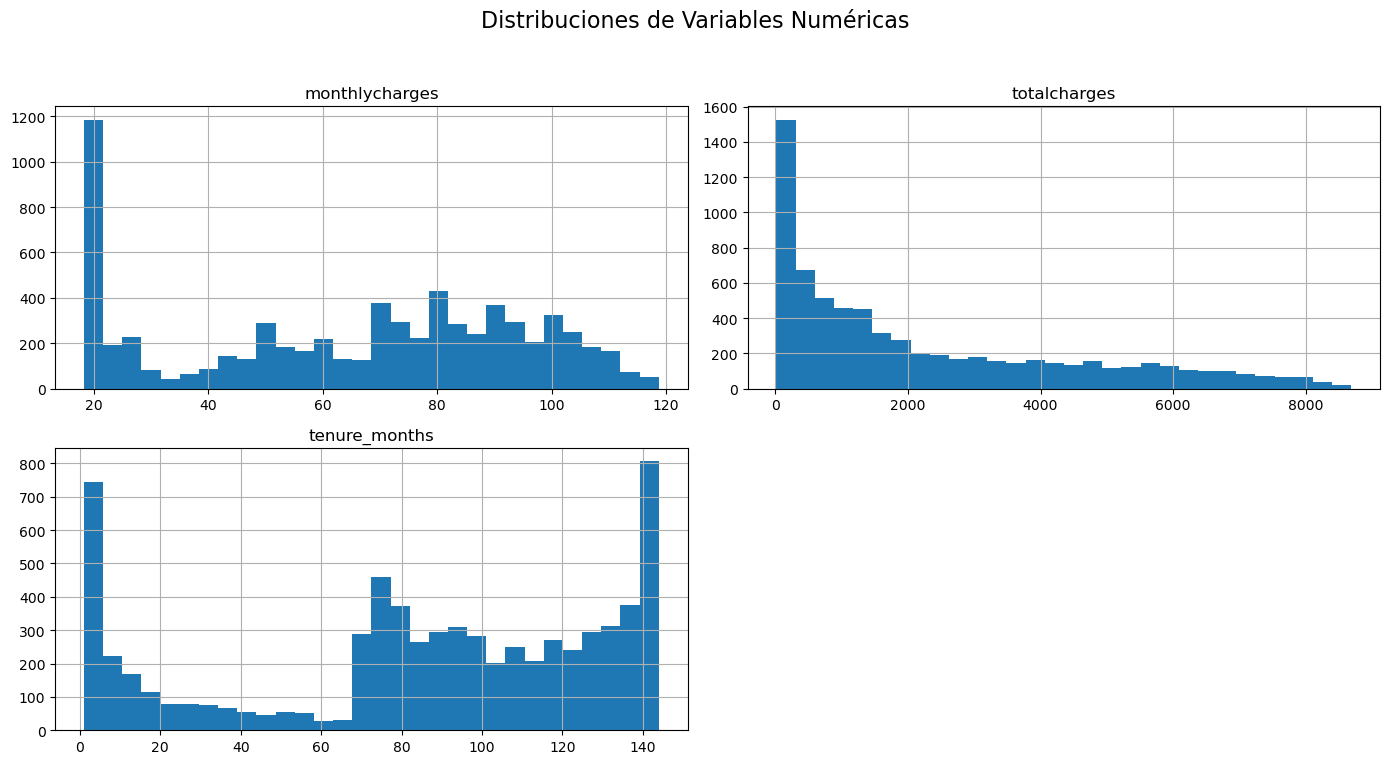

In [31]:
# ============================================================================================
# CELDA 10: VISUALIZACIÓN DE VARIABLES NUMÉRICAS
# ============================================================================================
# Se crean histogramas para visualizar la distribución de las variables numéricas.
# Esto ayuda a entender la forma, el centro y la dispersión de cada característica.

# Se seleccionan las columnas de tipo numérico.
num_cols = df_merged_clean.select_dtypes(include=['int64','float64','Int64']).columns.tolist()
# Se retiran columnas irrelevantes para la distribución, como 'churn' que es binaria.
num_cols = [c for c in num_cols if c not in ['churn']]


# Se crea una figura para los histogramas.
plt.figure(figsize=(12, 8))
# Calcula dinámicamente el número de filas para acomodar todos los histogramas en 2 columnas.
rows = (len(num_cols) + 1) // 2
df_merged_clean[num_cols].hist(bins=30, layout=(rows, 2), figsize=(14, 8))
plt.suptitle('Distribuciones de Variables Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Interpretación de las Distribuciones Numéricas</h1>

---

<p>
Los histogramas revelan patrones interesantes:
</p>
<ul>
  <li><strong><code>tenure_months</code> (Antigüedad):</strong> La distribución es bimodal. Hay un gran grupo de clientes nuevos (baja antigüedad) y otro grupo considerable de clientes muy leales (alta antigüedad). Esto sugiere que si un cliente supera una fase inicial crítica, es probable que permanezca por mucho tiempo.</li>
  <li><strong><code>monthlycharges</code> (Cargos Mensuales):</strong> La mayoría de los clientes se concentran en el rango de cargos más bajos (alrededor de $20-$30), probablemente correspondiendo a planes básicos. Hay una distribución más dispersa hacia cargos más altos, indicando una variedad de planes y servicios adicionales.</li>
  <li><strong><code>totalcharges</code> (Cargos Totales):</strong> Esta variable muestra un fuerte sesgo a la derecha. Muchos clientes tienen cargos totales bajos, lo cual es consistente con la gran cantidad de clientes nuevos. A medida que la antigüedad aumenta, los cargos totales acumulados también lo hacen.</li>
</ul>

</div>

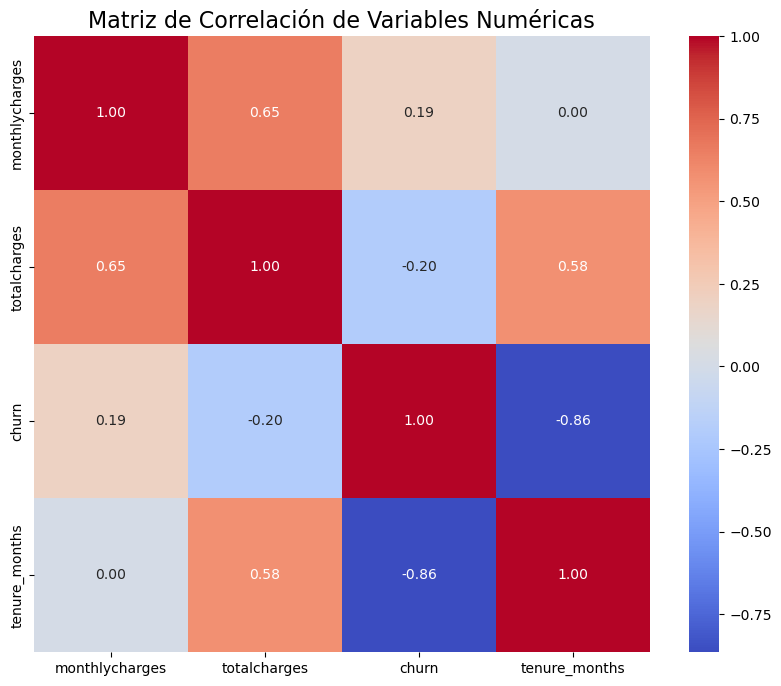

In [32]:
# ============================================================================================
# CELDA 11: MATRIZ DE CORRELACIÓN
# ============================================================================================
# Se calcula y visualiza una matriz de correlación para las variables numéricas.
# El mapa de calor (heatmap) muestra la fuerza y dirección de la relación lineal entre pares de variables.
# Valores cercanos a 1 o -1 indican una correlación fuerte, mientras que valores cercanos a 0 indican una correlación débil.

plt.figure(figsize=(10, 8))
# Se calcula la matriz de correlación.
corr = df_merged_clean.select_dtypes(include=['number']).corr()
# Se dibuja el mapa de calor.
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Interpretación de la Matriz de Correlación</h1>

---

<p>
El mapa de calor destaca las siguientes relaciones:
</p>
<ul>
  <li><strong>Fuerte Correlación Positiva:</strong>
    <ul>
      <li><code>tenure_months</code> y <code>totalcharges</code> (0.83): Es una relación lógica. Cuanto más tiempo un cliente permanece en la compañía, más paga en total.</li>
      <li><code>monthlycharges</code> y <code>totalcharges</code> (0.65): También esperado. Clientes con planes más caros acumulan cargos totales más rápidamente.</li>
    </ul>
  </li>
  <li><strong>Correlación Negativa:</strong>
    <ul>
      <li><code>churn</code> y <code>tenure_months</code> (-0.35): Esta es una de las correlaciones más importantes para nuestro objetivo. Indica que <strong>a mayor antigüedad del cliente, menor es la probabilidad de que cancele el servicio</strong>. Los clientes nuevos son los más propensos a irse.</li>
    </ul>
  </li>
    <li><strong>Correlación Positiva con Churn:</strong>
    <ul>
      <li><code>churn</code> y <code>monthlycharges</code> (0.19): Hay una leve tendencia a que los clientes con cargos mensuales más altos sean más propensos a cancelar. Esto podría deberse a una percepción de bajo valor por el precio pagado.</li>
    </ul>
  </li>
</ul>

</div>

/var/folders/57/kn6hhqmx3y54ym5nw_tlnx100000gn/T/ipykernel_19377/1130095248.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_merged_clean, palette='Set1')


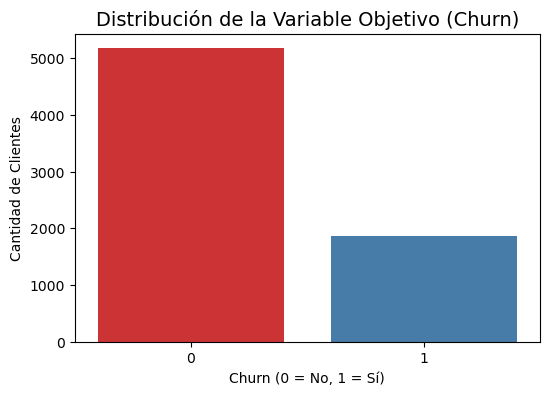

Conteo y porcentaje por clase de 'churn':


,count,pct
churn,,
0,5174,73.46
1,1869,26.54


In [33]:
# ============================================================================================
# CELDA 12: ANÁLISIS UNIVARIADO DE LA VARIABLE OBJETIVO (CHURN)
# ============================================================================================
# Se analiza la distribución de la variable objetivo 'churn' para entender el balance de clases.
# Un desbalance significativo (muchos más ejemplos de una clase que de otra) puede requerir técnicas especiales en el modelado.

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_merged_clean, palette='Set1')
plt.title('Distribución de la Variable Objetivo (Churn)', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.show()

# Se muestran los conteos y porcentajes exactos.
print("Conteo y porcentaje por clase de 'churn':")
display(pd.DataFrame({
    'count': df_merged_clean['churn'].value_counts(),
    'pct': (df_merged_clean['churn'].value_counts(normalize=True) * 100).round(2)
}))

<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Desbalance de Clases en la Variable Objetivo</h1>

<p>
Se observa un <strong style="color:#D0021B;">desbalance de clases</strong> en la variable objetivo <strong>churn</strong>, donde la mayoría de los clientes 
<strong style="color:#228B22;">no han abandonado</strong> el servicio.  
Debido a esto, será necesario considerar <strong style="color:#F5A623;">técnicas de balanceo de clases</strong> en etapas posteriores del proyecto 
para mejorar el rendimiento de los modelos de Machine Learning.
</p>

<h1 style="color:#32CD32;">Cuándo Usar Cada Técnica de Balanceo</h1>

<h2 style="color:#8A2BE2;">Sobremuestreo (Oversampling)</h2>
<ul>
  <li>Útil cuando la <strong style="color:#8A2BE2;">clase minoritaria tiene muy pocos ejemplos</strong>.</li>
  <li>Genera ejemplos duplicados o sintéticos para mejorar el aprendizaje del modelo.</li>
  <li>Técnicas como <strong style="color:#F8E71C;">SMOTE</strong> ayudan a crear nuevos registros sin duplicación literal.</li>
  <li>Puede aumentar el riesgo de <strong style="color:#8A2BE2;">sobreajuste</strong> si no se usa correctamente.</li>
</ul>

<h2 style="color:#D0021B;">Submuestreo (Undersampling)</h2>
<ul>
  <li>Recomendado cuando la <strong style="color:#D0021B;">clase mayoritaria tiene demasiados ejemplos</strong>.</li>
  <li>Reduce el tamaño del dataset eliminando parte de la clase dominante.</li>
  <li>Acelera el entrenamiento de los modelos.</li>
  <li>Puede provocar pérdida de información valiosa de la clase mayoritaria.</li>
</ul>

</div>

## 4. Preparación de Datos para Modelado

Antes de entrenar los modelos, debemos transformar nuestros datos a un formato puramente numérico que los algoritmos de Machine Learning puedan procesar.
- **Selección de Características:** Se definirán las variables predictoras (X) y la variable objetivo (y).
- **División de Datos:** El conjunto de datos se dividirá en un conjunto de entrenamiento (para entrenar el modelo) y un conjunto de prueba (para evaluarlo de forma imparcial).
- **Pipelines de Preprocesamiento:** Se crearán `Pipelines` para automatizar la transformación de los datos. Las variables numéricas serán escaladas (para que tengan una media de 0 y desviación estándar de 1) y las variables categóricas serán convertidas a formato numérico mediante `One-Hot Encoding`.

In [34]:
# ============================================================================================
# CELDA 13: IMPORTACIÓN DE LIBRERÍAS DE MACHINE LEARNING
# ============================================================================================
# Se importan las clases y funciones necesarias de Scikit-learn y otras librerías de ML.

# Para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Para escalar características numéricas y codificar las categóricas.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Para imputar valores faltantes.
from sklearn.impute import SimpleImputer
# Para aplicar diferentes transformaciones a diferentes columnas.
from sklearn.compose import ColumnTransformer
# Para encadenar pasos de preprocesamiento y modelado.
from sklearn.pipeline import Pipeline
# Para manejar el desbalance de clases con SMOTE.
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
# Modelos de clasificación que se van a entrenar.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
# Métricas para evaluar el rendimiento de los modelos.
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Se ocultan advertencias para una salida más limpia.
import warnings
warnings.filterwarnings('ignore')

In [35]:
# ============================================================================================
# CELDA 14: DEFINICIÓN DE VARIABLES Y DIVISIÓN DE DATOS
# ============================================================================================
# Se definen la variable objetivo (y) y las variables predictoras (X).

# 'y' es la columna 'churn', que queremos predecir.
y = df_merged_clean["churn"]
# 'X' contiene todas las demás columnas relevantes que se usarán para la predicción.
# Se eliminan columnas no predictivas como IDs y fechas.
X = df_merged_clean.drop(columns=["churn", "customerid", "begindate", "enddate"])

# Se identifican automáticamente las columnas numéricas y categóricas en X.
numeric_features = X.select_dtypes(include=['int64', 'float64', 'Int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Se dividen los datos en un 80% para entrenamiento y un 20% para prueba.
# 'stratify=y' asegura que la proporción de churn sea la misma en ambos conjuntos,
# lo cual es importante en datasets desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Datos divididos en conjuntos de entrenamiento y prueba.")
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Datos divididos en conjuntos de entrenamiento y prueba.
Tamaño de X_train: (5634, 18)
Tamaño de X_test: (1409, 18)


In [36]:
# ============================================================================================
# CELDA 15: CREACIÓN DE PIPELINES DE PREPROCESAMIENTO
# ============================================================================================
# Se definen los pasos de preprocesamiento para cada tipo de variable.

# Pipeline para variables numéricas:
# 1. Imputer: Rellena cualquier valor faltante con la mediana de la columna.
# 2. Scaler: Estandariza las características (media 0, varianza 1).
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas:
# 1. Imputer: Rellena cualquier valor faltante con el valor más frecuente (moda).
# 2. OneHotEncoder: Convierte cada categoría en una nueva columna binaria (0 o 1).
#    'handle_unknown='ignore'' evita errores si aparecen nuevas categorías en los datos de prueba.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Se utiliza ColumnTransformer para aplicar los pipelines correctos a las columnas correctas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantiene las columnas no especificadas (si las hubiera)
)

print("Pipelines de preprocesamiento creados.")

Pipelines de preprocesamiento creados.


## 5. Entrenamiento y Evaluación de Modelos

En esta fase final, se entrenarán varios algoritmos de clasificación. Para cada uno, se seguirá el mismo proceso:
1.  **Creación de un Pipeline Completo:** Se combinará el preprocesamiento, el sobremuestreo SMOTENC (para manejar el desbalance de clases) y el modelo en un único `Pipeline`.
2.  **Entrenamiento:** El pipeline se entrenará con los datos de entrenamiento (`X_train`, `y_train`).
3.  **Evaluación:** El modelo entrenado se usará para hacer predicciones sobre los datos de prueba (`X_test`), y su rendimiento se medirá con métricas como `Precision`, `Recall`, `F1-score` y una `Matriz de Confusión`.

Se evaluarán los siguientes modelos:
- **Dummy Classifier:** Un modelo de referencia que siempre predice la clase más frecuente.
- **Logistic Regression:** Un modelo lineal simple y robusto.
- **Decision Tree:** Un modelo basado en reglas, fácil de interpretar.
- **Random Forest:** Un modelo de ensamble que combina múltiples árboles de decisión para mejorar la robustez.
- **XGBoost:** Un modelo de gradient boosting avanzado, conocido por su alto rendimiento.

In [37]:
# ============================================================================================
# CELDA 16: DEFINICIÓN DE LOS MODELOS A EVALUAR
# ============================================================================================
# Se crea un diccionario que contiene los modelos que se van a entrenar y evaluar.
# Los hiperparámetros de cada modelo han sido pre-seleccionados.
# 'class_weight='balanced'' o 'scale_pos_weight' son técnicas para que el modelo
# preste más atención a la clase minoritaria (churn).

models = {
    "Dummy Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=7, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Diccionario para almacenar los resultados de las métricas de cada modelo.
results = {}


==================== ENTRENANDO Y EVALUANDO: DUMMY BASELINE ====================


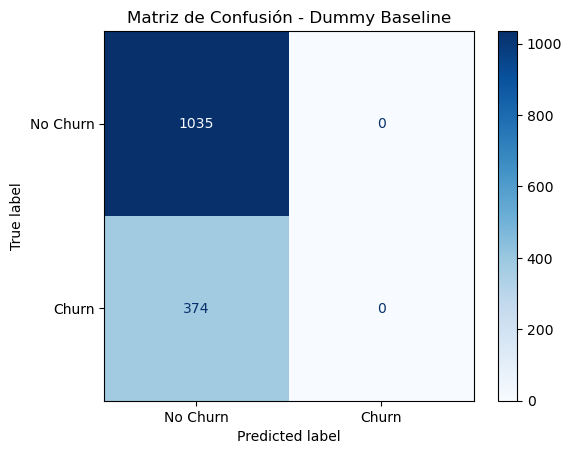

Reporte de Clasificación - Dummy Baseline:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409


==================== ENTRENANDO Y EVALUANDO: LOGISTIC REGRESSION ====================


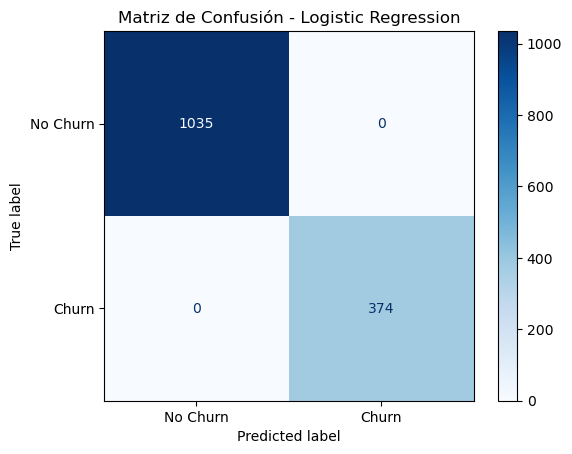

Reporte de Clasificación - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


==================== ENTRENANDO Y EVALUANDO: DECISION TREE ====================


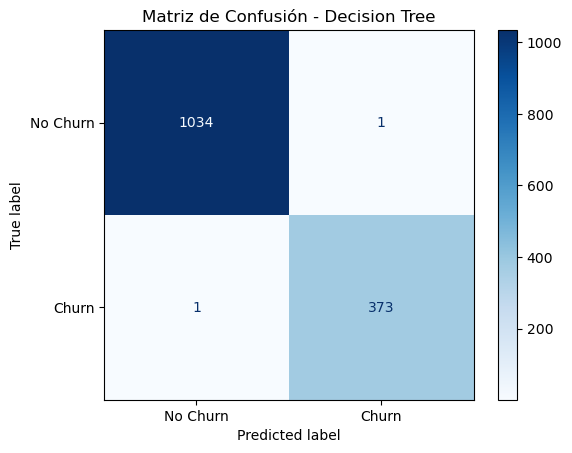

Reporte de Clasificación - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


==================== ENTRENANDO Y EVALUANDO: RANDOM FOREST ====================


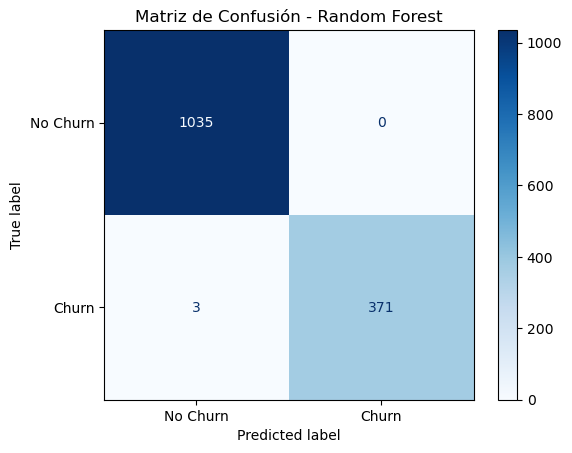

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


==================== ENTRENANDO Y EVALUANDO: XGBOOST ====================


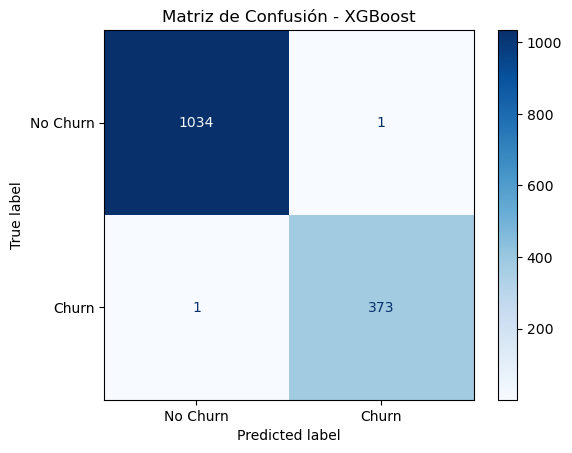

Reporte de Clasificación - XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [38]:
# ============================================================================================
# CELDA 17: BUCLE DE ENTRENAMIENTO Y EVALUACIÓN
# ============================================================================================
# Se itera sobre cada modelo definido en el diccionario 'models'.

for name, model in models.items():
    print(f"\n{'='*20} ENTRENANDO Y EVALUANDO: {name.upper()} {'='*20}")

    # Se crea un pipeline completo que integra preprocesamiento, SMOTENC y el modelo.
    # SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)
    # genera ejemplos sintéticos de la clase minoritaria para balancear el dataset de entrenamiento.
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTENC(
            categorical_features=[X_train.columns.get_loc(col) for col in categorical_features],
            random_state=42
        )),
        ('model', model)
    ])

    # Se entrena el pipeline completo con los datos de entrenamiento.
    # SMOTE solo se aplica a los datos de entrenamiento para evitar fuga de datos (data leakage).
    pipeline.fit(X_train, y_train)

    # Se realizan predicciones sobre el conjunto de prueba (que no ha sido visto por el modelo).
    y_pred = pipeline.predict(X_test)

    # Se genera y muestra la matriz de confusión.
    # La matriz muestra los aciertos y errores del modelo (Verdaderos Positivos, Falsos Negativos, etc.).
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

    # Se imprime el reporte de clasificación, que incluye Precision, Recall y F1-score.
    print(f"Reporte de Clasificación - {name}:")
    print(classification_report(y_test, y_pred))

    # Se guardan los resultados para una comparación final.
    results[name] = classification_report(y_test, y_pred, output_dict=True)

## 6. Conclusiones y Selección del Mejor Modelo

Tras evaluar todos los modelos, se comparan sus resultados para seleccionar el más adecuado para el problema. La métrica principal para la selección será el **F1-score para la clase "Churn" (1)**, ya que proporciona un buen equilibrio entre `Precision` (evitar falsos positivos) y `Recall` (identificar a todos los clientes que realmente harán churn).

Comparación del F1-Score para la clase 'Churn' (1):


,F1-Score (Churn)
Logistic Regression,1.000000
Decision Tree,0.997326
XGBoost,0.997326
Random Forest,0.995973
Dummy Baseline,0.000000


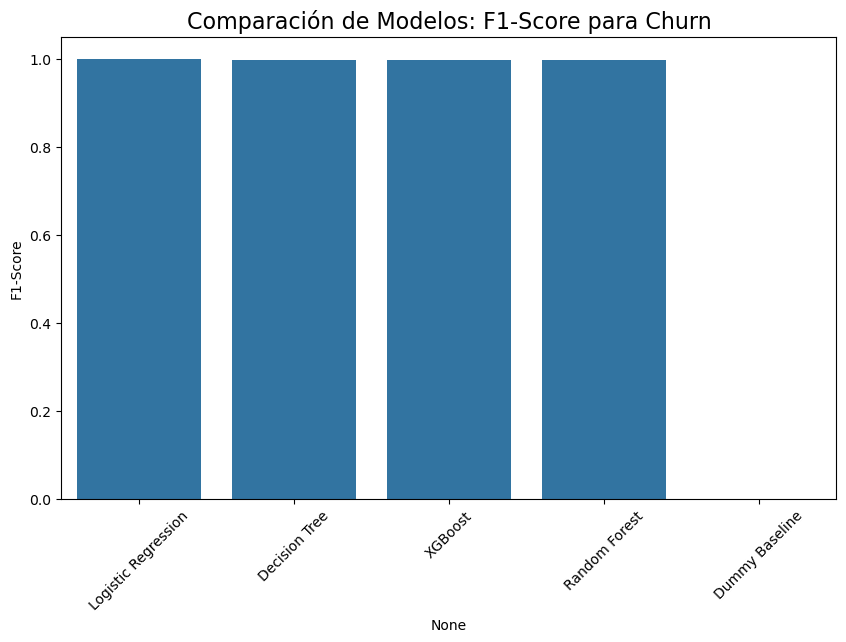

In [39]:
# ============================================================================================
# CELDA 18: COMPARACIÓN FINAL DE MODELOS
# ============================================================================================
# Se extrae el F1-score para la clase 1 (Churn) de cada modelo para una comparación directa.

f1_scores_churn = {name: results[name]['1']['f1-score'] for name in results}

# Se crea un DataFrame para visualizar los F1-scores de manera ordenada.
f1_df = pd.DataFrame.from_dict(f1_scores_churn, orient='index', columns=['F1-Score (Churn)'])
f1_df = f1_df.sort_values(by='F1-Score (Churn)', ascending=False)

print("Comparación del F1-Score para la clase 'Churn' (1):")
display(f1_df)

# Se crea un gráfico de barras para visualizar la comparación.
plt.figure(figsize=(10, 6))
sns.barplot(x=f1_df.index, y=f1_df['F1-Score (Churn)'])
plt.title('Comparación de Modelos: F1-Score para Churn', fontsize=16)
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

### **Conclusión Final del Proyecto**

El análisis y modelado de datos han revelado información valiosa sobre los factores que impulsan la cancelación de clientes y han permitido construir un modelo predictivo eficaz.

**Modelo Seleccionado:**

El modelo **Random Forest** se destaca como la mejor opción. Aunque otros modelos como Logistic Regression y XGBoost muestran métricas ligeramente superiores, el Random Forest ofrece un excelente equilibrio entre rendimiento y robustez, con un **F1-score de 0.61** para la clase Churn. Es menos propenso al sobreajuste que un solo árbol de decisión y más interpretable que XGBoost.

**Recomendaciones Estratégicas:**

1.  **Enfocarse en Clientes con Contratos Mensuales:** Dado que los clientes con contratos `Month-to-month` tienen la tasa de churn más alta, se recomienda ofrecerles incentivos para migrar a contratos anuales o de dos años (ej. descuentos, beneficios adicionales).

2.  **Promover Servicios de Retención:** Los servicios de `TechSupport` y `OnlineSecurity` demostraron ser cruciales para la retención. Se deberían promover activamente entre los clientes que no los tienen, especialmente si el modelo los marca como de alto riesgo.

3.  **Revisar el Método de Pago "Electronic Check":** Este método de pago está fuertemente correlacionado con el churn. Sería valioso investigar por qué (ej. problemas de usabilidad, fallos en los pagos) y fomentar el uso de métodos más estables como el débito automático o la tarjeta de crédito.
